In [88]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#import jupyter_bokeh
import ipywidgets as widgets
import panel as pn
pn.extension("tabulator")
import math
import hvplot.pandas

# ipywidgets

%pip install jupyter_bokeh

In [89]:
def plot_fct(w= 4,style="dark_background"): 
    X=np.random.uniform(0,5,size=100)
    plt.style.use(style)
    Y=2*X+w*np.random.normal(size=100)
    plt.scatter(X,Y)
    plt.show()

In [90]:
widgets.interact(plot_fct,w=(0,5,0.5))


interactive(children=(FloatSlider(value=4.0, description='w', max=5.0, step=0.5), Text(value='dark_background'…

<function __main__.plot_fct(w=4, style='dark_background')>

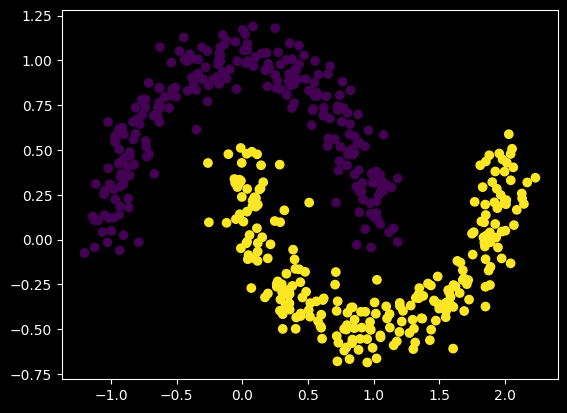

In [91]:
from sklearn.datasets import make_moons

moons=make_moons(n_samples=500,noise=0.1)
X ,y= moons[0],moons[1]
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [92]:
def plot_moons(sample=200,noise=0):
    moons=make_moons(n_samples=sample,noise=noise,random_state=50)
    X,y=moons[0],moons[1]
    plt.scatter(X[:,0],X[:,1],c=y)
    plt.show()

In [93]:
widgets.interact(plot_moons,sample=[200,500,1000],noise=(0,2,0.1))

interactive(children=(Dropdown(description='sample', options=(200, 500, 1000), value=200), FloatSlider(value=0…

<function __main__.plot_moons(sample=200, noise=0)>

In [94]:
def plot_sin(start=0,end=30,factor=1,grid=False,plot_cos=False):
    X=np.linspace(start,end,(end-start)*10)
    y=np.sin(X)*factor
    plt.grid(grid)
    plt.plot(X,y)
    if plot_cos:
        y=np.cos(X)
        plt.plot(X,y)

In [95]:
widgets.interact(plot_sin,start=(0,10,1),end=(20,50,1),factor=(0,5,0.1),grid=False)

interactive(children=(IntSlider(value=0, description='start', max=10), IntSlider(value=30, description='end', …

<function __main__.plot_sin(start=0, end=30, factor=1, grid=False, plot_cos=False)>

In [96]:
def plot_sigmoid(x_in=0):
    X=np.linspace(-5,5,1000)
    y=1/(1+np.exp(-X))
    y_in=1/(1+math.exp(-x_in))

    plt.plot(X,y)
    plt.scatter(x_in,y_in,c="r")
    plt.plot([x_in,x_in],[0,y_in],"r--")
    plt.plot([-5,x_in],[y_in,y_in],"r--")

In [97]:
widgets.interact(plot_sigmoid,x_in=(-5,5,0.1))

interactive(children=(FloatSlider(value=0.0, description='x_in', max=5.0, min=-5.0), Output()), _dom_classes=(…

<function __main__.plot_sigmoid(x_in=0)>

In [98]:
def plot_hist(mu=0,sigma=1,n=100,bins=10,color="blue"):
    plt.xlim(-20,20)
    X=np.random.normal(mu,sigma,n)
    plt.hist(X,bins,color=color)

In [99]:
widgets.interact(plot_hist,mu=(-10,10,0.5),sigma=(0,10,0.1),n=(10,100,1),bins=(1,100,1),color=["red","green","blue"])

interactive(children=(FloatSlider(value=0.0, description='mu', max=10.0, min=-10.0, step=0.5), FloatSlider(val…

<function __main__.plot_hist(mu=0, sigma=1, n=100, bins=10, color='blue')>

In [100]:
widgets.interact_manual(plot_hist,mu=(-10,10,0.5),sigma=(0,10,0.1),n=(10,100,1),bins=(1,100,1),color=["red","green","blue"])

interactive(children=(FloatSlider(value=0.0, description='mu', max=10.0, min=-10.0, step=0.5), FloatSlider(val…

<function __main__.plot_hist(mu=0, sigma=1, n=100, bins=10, color='blue')>

# panel

#### panel,hvPlot,HoloViews,GeoViews,Datashader,Param,Colorcet from HoloViz-maintained Libraries
https://www.youtube.com/watch?v=uhxiXOTKzfs

%pip install hvplot

In [101]:
df=pd.read_csv("https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv")
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.165,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.163,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [102]:
# Fill NA's with 0 and create GDP per capita column
df=df.fillna(0)
df["gdp_per_capita"]=np.where(df["population"]!=0,df["gdp"]/df["population"],0)

In [103]:
# Make DataFrame pipeline Interactive
idf=df.interactive()

In [104]:
# Define Panel widget
year_slide=pn.widgets.IntSlider(name="Year Slider",start=1750,end=2020,step=5,value=1850)
year_slide

BokehModel(combine_events=True, render_bundle={'docs_json': {'fe518881-c31c-4441-b2e7-8d0b9bfeed14': {'version…

In [105]:
# Radio button for CO2 measures
yaxis_co2=pn.widgets.RadioBoxGroup(
    name="Y axis",
    options=["co2","co2_per_capita"],
    button_type="sucess"
)

In [106]:
continents=["World","Asia","Oceania","Europe","Africa","North America","South America","Antarctica"]

co2_pipeline=(
    idf[
        (idf.year<=year_slide) &
        (idf.country.isin(continents))
    ]
    .groupby(['country', 'year'])[yaxis_co2].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='year')  
    .reset_index(drop=True)
)

In [107]:
co2_pipeline

BokehModel(combine_events=True, render_bundle={'docs_json': {'3a077df7-6054-4349-bd76-e3bdf71d119b': {'version…

In [108]:
co2_plot = co2_pipeline.hvplot(x = 'year', by='country', y=yaxis_co2,line_width=2, title="CO2 emission by continent")
co2_plot

BokehModel(combine_events=True, render_bundle={'docs_json': {'384442d3-ab82-4f73-b610-1b2ce5062630': {'version…

# CO2 emission over time by continent

In [109]:
co2_table = co2_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width') 
co2_table


BokehModel(combine_events=True, render_bundle={'docs_json': {'6aadec3c-7196-4857-b1ab-d33409809944': {'version…

# CO2 vs GDP scatterplot

In [110]:
co2_vs_gdp_scatterplot_pipeline = (
    idf[
        (idf.year == year_slide) &
        (~ (idf.country.isin(continents)))
    ]
    .groupby(['country', 'year', 'gdp_per_capita'])['co2'].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='year')  
    .reset_index(drop=True)
)

In [111]:

co2_vs_gdp_scatterplot_pipeline

BokehModel(combine_events=True, render_bundle={'docs_json': {'0ad5044f-7f27-4a93-86e3-fec7cc8cf08e': {'version…

In [112]:
co2_vs_gdp_scatterplot = co2_vs_gdp_scatterplot_pipeline.hvplot(x='gdp_per_capita', 
                                                                y='co2', 
                                                                by='country', 
                                                                size=80, kind="scatter", 
                                                                alpha=0.7,
                                                                legend=False, 
                                                                height=500, 
                                                                width=500)
co2_vs_gdp_scatterplot


BokehModel(combine_events=True, render_bundle={'docs_json': {'845cfdd1-95db-43ae-b15a-559e78d92ee2': {'version…

# Bar chart with CO2 sources by continent

In [113]:
yaxis_co2_source = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['coal_co2', 'oil_co2', 'gas_co2'], 
    button_type='success'
)

continents_excl_world = ['Asia', 'Oceania', 'Europe', 'Africa', 'North America', 'South America', 'Antarctica']

co2_source_bar_pipeline = (
    idf[
        (idf.year == year_slide) &
        (idf.country.isin(continents_excl_world))
    ]
    .groupby(['year', 'country'])[yaxis_co2_source].sum()
    .to_frame()
    .reset_index()
    .sort_values(by='year')  
    .reset_index(drop=True)
)

In [114]:
co2_source_bar_plot = co2_source_bar_pipeline.hvplot(kind='bar', 
                                                     x='country', 
                                                     y=yaxis_co2_source, 
                                                     title='CO2 source by continent')
co2_source_bar_plot

BokehModel(combine_events=True, render_bundle={'docs_json': {'49234e36-c662-4e74-b1cf-8d279cd68925': {'version…

# Creating Dashboard

FastListTemplate
    [js_area] HTML(None, height=0, margin=0, sizing_mode='fixed', width=0)
    [actions] TemplateActions()
    [browser_info] BrowserInfo()
    [busy_indicator] LoadingSpinner(height=20, width=20)
    [2189941541392] Row
        [0] Column(margin=(0, 25))
            [0] RadioBoxGroup(name='Y axis', options=['co2', 'co2_per_capita'], value='co2')
            [1] ParamFunction(function, _pane=HoloViews, defer_load=False, width=600)
        [1] ParamFunction(function, _pane=Tabulator, defer_load=False, width=400)
    [2189940539152] Row
        [0] Column(margin=(0, 25))
            [0] ParamFunction(function, _pane=HoloViews, defer_load=False, width=500)
        [1] Column
            [0] RadioButtonGroup(button_type='success', name='Y axis', options=['coal_co2', 'oil_co2', ...], value='coal_co2')
            [1] ParamFunction(function, _pane=HoloViews, defer_load=False, width=500)
    [2189859060240] Markdown(str)
    [2189879082896] Markdown(str)
    [2189941464976] PNG(str, sizing_mode='scale_both')
    [2189941407824] Markdown(str)
    [2189498927952] IntSlider(end=2020, name='Year Slider', start=1750, step=5, value=1850)
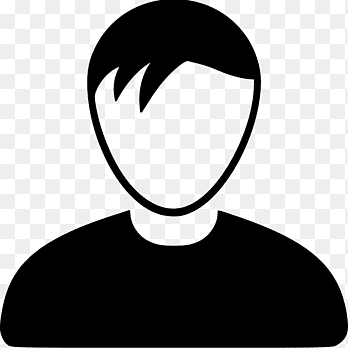

In [118]:
#Layout using Template
template = pn.template.FastListTemplate(
    title='World CO2 emission dashboard', 
    sidebar=[pn.pane.Markdown("# CO2 Emissions and Climate Change"), 
             pn.pane.Markdown("#### Carbon dioxide emissions are the primary driver of global climate change. It’s widely recognised that to avoid the worst impacts of climate change, the world needs to urgently reduce emissions. But, how this responsibility is shared between regions, countries, and individuals has been an endless point of contention in international discussions."), 
             pn.pane.PNG('106317445.png', sizing_mode='scale_both'),
             pn.pane.Markdown("## Settings"),   
             year_slide],
    main=[pn.Row(pn.Column(yaxis_co2, 
                           co2_plot.panel(width=600), margin=(0,25)), 
                 co2_table.panel(width=400)), 
          pn.Row(pn.Column(co2_vs_gdp_scatterplot.panel(width=500), margin=(0,25)), 
                 pn.Column(yaxis_co2_source, co2_source_bar_plot.panel(width=500)))],
    accent_base_color="#88d8b0",
    header_background="#88d8b0",
)
# template.show()
template.servable()